In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('training_data.csv')
df.head(100)
df.shape

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(424431, 69)

In [3]:
df.columns[df.isnull().any()]

Index(['Vehicle_Bodily_Injury_Limit', 'EEA_Prior_Bodily_Injury_Limit'], dtype='object')

In [4]:
missing_values = df.isnull().mean()
missing_values.sum()

0.08164342378384237

In [5]:
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


In [6]:
df.apply(axis=0, func=lambda x : any(pd.isnull(x)))

PolicyNo                                    False
Policy_Company                              False
Policy_Installment_Term                     False
Policy_Billing_Code                         False
Policy_Method_Of_Payment                    False
Policy_Reinstatement_Fee_Indicator          False
Policy_Zip_Code_Garaging_Location           False
Vehicle_Territory                           False
Vehicle_Make_Year                           False
Vehicle_Make_Description                    False
Vehicle_Performance                         False
Vehicle_New_Cost_Amount                     False
Vehicle_Symbol                              False
Vehicle_Number_Of_Drivers_Assigned          False
Vehicle_Usage                               False
Vehicle_Miles_To_Work                       False
Vehicle_Days_Per_Week_Driven                False
Vehicle_Annual_Miles                        False
Vehicle_Anti_Theft_Device                   False
Vehicle_Passive_Restraint                   False


### EEA_Prior_Bodily_Injury_Limit, Vehicle_Bodily_Injury_Limit column had missing values

In [7]:
import missingno as msno
msno.matrix(df)  # just to visualize. no missing value.

In [8]:
df.columns

Index(['PolicyNo', 'Policy_Company', 'Policy_Installment_Term',
       'Policy_Billing_Code', 'Policy_Method_Of_Payment',
       'Policy_Reinstatement_Fee_Indicator',
       'Policy_Zip_Code_Garaging_Location', 'Vehicle_Territory',
       'Vehicle_Make_Year', 'Vehicle_Make_Description', 'Vehicle_Performance',
       'Vehicle_New_Cost_Amount', 'Vehicle_Symbol',
       'Vehicle_Number_Of_Drivers_Assigned', 'Vehicle_Usage',
       'Vehicle_Miles_To_Work', 'Vehicle_Days_Per_Week_Driven',
       'Vehicle_Annual_Miles', 'Vehicle_Anti_Theft_Device',
       'Vehicle_Passive_Restraint', 'Vehicle_Age_In_Years',
       'Vehicle_Med_Pay_Limit', 'Vehicle_Bodily_Injury_Limit',
       'Vehicle_Physical_Damage_Limit',
       'Vehicle_Comprehensive_Coverage_Indicator',
       'Vehicle_Comprehensive_Coverage_Limit',
       'Vehicle_Collision_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Deductible', 'Driver_Total',
       'Driver_Total_Male', 'Driver_Total_Female', 'Driver_Total_Single',
     

## Columns to consider
1. The Loss Ratio of a policy is just the Loss Amount divided by the Premium.

2. The Loss Ratio of a portfolio of policies is the sum of all the Loss Amounts of all the policies in the portfolio divided by the sum of all the Premiums in the portfolio.

3. Your target is the natural logarithm of the the loss Ratio of a portfolio.

#### Columns
* Loss_Amount
* Annual_Premium

In [9]:
missing = df.Loss_Amount.isnull().mean()
missing.sum()

0.0

In [10]:
missing = df.Annual_Premium.isnull().mean()
missing.sum()

0.0

## Goal: given the attributes of a new policy predict whether there will be a claim and what will be the loss ratio (loss/premium).
## EEA Blog: With machine learning you can model loss ratio directlyhttp://eeanalytics.com/blog/with-machine-learning-you-can-model-loss-ratio-directly 

In [11]:
import numpy as np
for col in list(df):
    print(col)
    print(df[col].unique())
   

PolicyNo
[164532941 164533241 164534633 ... 382057400 382162500 382348800]
Policy_Company
['Standard ' 'Preferred']
Policy_Installment_Term
[ 6 12]
Policy_Billing_Code
['Direct Billed to Insured' 'Premium Finance']
Policy_Method_Of_Payment
['Pre-paid' 'Installment']
Policy_Reinstatement_Fee_Indicator
['N' 'Y']
Policy_Zip_Code_Garaging_Location
['43046' 'Unknown' '43555' ... 43191 82216 42670]
Vehicle_Territory
[35 17 27 31 30 32 26 13 16 36 20 37 18 22 15 19]
Vehicle_Make_Year
[2004 1980 2005 1985 2002 1991 2001 1995 1997 1998 1990 1986 1992 1996
 1984 1988 2006 1999 2003 2000 1975 1993 1982 1994 2007 1978 1983 1987
 1977 1973 1989 1969 1976 1954 1979 1970 1955 1964 1981 1966 1972 1965
 1971 1961 1962 1967 1968 1974 1960 1952 1953 1940 1963 2008 1959 1957
 1950 1928 1956 1947 1948 1951 1939 1958 1949 1941 1934 1946 1930 1932
 1937 1924 1935 1938 1931 1936 1945 1929 1942 1927]
Vehicle_Make_Description
['BUIK LESABRE LI  ' 'CADILLAC   4-DOOR' 'PONT MONTANA SV  ' ...
 'SUZUKI FORENZ    ' 

['Standard' 'Preferred' 'Non-standard' 'Hybrid']
EEA_Packaged_Policy_Indicator
['N' 'Y']
EEA_Full_Coverage_Indicator
['Y' 'N']
EEA_Prior_Bodily_Injury_Limit
['100-400' '100-200' '40-100 ' '20-50' nan '200-400' '75-300' '300-300'
 '750-750']
EEA_PolicyYear
[2006]
SYS_Renewed
['Y' 'N']
SYS_New_Business
['N' 'Y']
Annual_Premium
[320.12 259.7  613.74 ... 541.26 117.13 118.21]
Claim_Count
[0 1 2 3 4 5]
Loss_Amount
[   0.     54.5   209.44 ... 1717.   9066.76  571.19]
Frequency
[  0.           2.           4.           1.           2.38948626
   2.56344527   3.09405941   4.06669378   3.51493849   2.87273772
   6.83060109 185.18518519   3.71747212   2.02224469   2.03334689
   6.           2.80033604   2.96735905   2.70124257   3.30906684
   3.51864884   4.52488688   5.81057525   2.62329486   2.80583614
   2.33535731   7.07714084   3.65630713   2.299908     7.4682599
  12.57861635   1.00270731   2.09161263   4.1356493    6.84228532
   2.52079657   2.64200793   6.57030223   4.41501104   2.80898

In [12]:
 print(df[col].unique().sum())

409267.1


In [13]:
# to get all Categorical Columns
df.select_dtypes(exclude=['int', 'float']).columns

Index(['Policy_Company', 'Policy_Billing_Code', 'Policy_Method_Of_Payment',
       'Policy_Reinstatement_Fee_Indicator',
       'Policy_Zip_Code_Garaging_Location', 'Vehicle_Make_Description',
       'Vehicle_Performance', 'Vehicle_Usage', 'Vehicle_Annual_Miles',
       'Vehicle_Anti_Theft_Device', 'Vehicle_Passive_Restraint',
       'Vehicle_Bodily_Injury_Limit',
       'Vehicle_Comprehensive_Coverage_Indicator',
       'Vehicle_Collision_Coverage_Indicator',
       'Vehicle_Youthful_Driver_Indicator',
       'Vehicle_Youthful_Driver_Training_Code',
       'Vehicle_Youthful_Good_Student_Code',
       'Vehicle_Safe_Driver_Discount_Indicator',
       'EEA_Liability_Coverage_Only_Indicator',
       'EEA_Multi_Auto_Policies_Indicator', 'EEA_Policy_Zip_Code_3',
       'EEA_Agency_Type', 'EEA_Packaged_Policy_Indicator',
       'EEA_Full_Coverage_Indicator', 'EEA_Prior_Bodily_Injury_Limit',
       'SYS_Renewed', 'SYS_New_Business'],
      dtype='object')

In [14]:
# Pre-processing
df = df.drop(['PolicyNo','Vehicle_Make_Description','Loss_Ratio','EEA_PolicyYear','Vehicle_Comprehensive_Coverage_Limit','Vehicle_Comprehensive_Coverage_Indicator'], axis=1)


In [15]:
df = df[(df.EEA_Policy_Zip_Code_3 != "Unknown")  & (df.Vehicle_Anti_Theft_Device != "Unknown") & 
        (df.Vehicle_Passive_Restraint != "Unknown") & (df.Policy_Zip_Code_Garaging_Location != "Unknown") &
        (df.Vehicle_Days_Per_Week_Driven != -1) & (df.EEA_Policy_Tenure != -1) & 
        (df.Vehicle_Symbol != -1) & (df.Vehicle_Bodily_Injury_Limit.dropna() ) & (df.Vehicle_Bodily_Injury_Limit != '1M-1M  ') &
       (df.Driver_Maximum_Age != 0 ) & (df.Driver_Minimum_Age != 0 ) ]

In [16]:
df.shape

(403498, 63)

In [17]:
df['Vehicle_New_Cost_Amount'] =df['Vehicle_New_Cost_Amount'].mask(df['Vehicle_New_Cost_Amount'] == -1)
df['Vehicle_New_Cost_Amount'].fillna(df['Vehicle_New_Cost_Amount'].mean(), inplace=True)
df['Vehicle_Miles_To_Work'] =df['Vehicle_Miles_To_Work'].mask(df['Vehicle_Miles_To_Work'] == -1)
df['Vehicle_Miles_To_Work'].fillna(df['Vehicle_Miles_To_Work'].mean(), inplace=True)
df['Vehicle_Med_Pay_Limit'] =df['Vehicle_Med_Pay_Limit'].mask(df['Vehicle_Med_Pay_Limit'] == -1)
df['Vehicle_Med_Pay_Limit'].fillna(df['Vehicle_Med_Pay_Limit'].mean(), inplace=True)
df['Vehicle_Physical_Damage_Limit'] =df['Vehicle_Physical_Damage_Limit'].mask(df['Vehicle_Physical_Damage_Limit'] == -1)
df['Vehicle_Physical_Damage_Limit'].fillna(df['Vehicle_Physical_Damage_Limit'].mean(), inplace=True)
df['Vehicle_Collision_Coverage_Deductible'] =df['Vehicle_Collision_Coverage_Deductible'].mask(df['Vehicle_Collision_Coverage_Deductible'] == -1)
df['Vehicle_Collision_Coverage_Deductible'] = df['Vehicle_Collision_Coverage_Deductible'].fillna(0)
df

,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_New_Cost_Amount,...,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity
0,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,Standard,17160.837641,...,N,Y,100-400,Y,N,320.12,0,0.00,0.000000,0.00
2,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,Standard,17160.837641,...,N,Y,100-400,Y,N,613.74,0,0.00,0.000000,0.00
3,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,Standard,17160.837641,...,Y,Y,40-100,Y,N,541.66,0,0.00,0.000000,0.00
4,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,Standard,17160.837641,...,Y,Y,40-100,Y,N,541.66,0,0.00,0.000000,0.00
5,Standard,6,Direct Billed to Insured,Pre-paid,N,43052,27,1985,Standard,17160.837641,...,Y,N,20-50,Y,N,164.30,0,0.00,0.000000,0.00
7,Standard,6,Direct Billed to Insured,Pre-paid,N,42858,35,2005,Standard,17160.837641,...,Y,Y,100-400,Y,N,336.02,0,0.00,0.000000,0.00
8,Standard,6,Direct Billed to Insured,Pre-paid,Y,42980,30,1991,Standard,17160.837641,...,N,N,40-100,Y,N,103.88,0,0.00,0.000000,0.00
9,Standard,6,Direct Billed to Insured,Pre-paid,N,42597,30,2005,Intermediate,17160.837641,...,Y,Y,100-200,Y,N,505.62,0,0.00,0.000000,0.00
10,Standard,6,Direct Billed to Insured,Installment,N,42608,31,2001,Standard,17160.837641,...,N,Y,20-50,Y,N,390.08,0,0.00,0.000000,0.00
11,Standard,6,Direct Billed to Insured,Pre-paid,Y,43888,31,1995,Standard,17160.837641,...,N,N,40-100,Y,N,121.90,0,0.00,0.000000,0.00


In [18]:
df['Vehicle_Number_Of_Drivers_Assigned'].replace([99],9)
df['Vehicle_Number_Of_Drivers_Assigned'].unique()

array([ 1, 99,  2,  3,  4,  5,  8,  7,  6])

In [19]:
df['Vehicle_Number_Of_Drivers_Assigned'] =df['Vehicle_Number_Of_Drivers_Assigned'].mask(df['Vehicle_Number_Of_Drivers_Assigned'] == 99)
df['Vehicle_Number_Of_Drivers_Assigned'].fillna(9, inplace = True)

In [20]:
df['Vehicle_Number_Of_Drivers_Assigned'].unique()

array([1., 9., 2., 3., 4., 5., 8., 7., 6.])

In [21]:
df['Vehicle_Annual_Miles'] =df['Vehicle_Annual_Miles'].mask(df['Vehicle_Annual_Miles'] == "Unknown")
df['Vehicle_Annual_Miles'].fillna('0', inplace = True)
df['Vehicle_Annual_Miles'] = df['Vehicle_Annual_Miles'].astype(int)
df['Vehicle_Annual_Miles'].unique()

array([     0,  30000,  50000,  20000,  70000, 100000,  60000, 150000,
       500000])

In [22]:
df['Vehicle_Annual_Miles'] =df['Vehicle_Annual_Miles'].mask(df['Vehicle_Annual_Miles'] == 0)
df['Vehicle_Annual_Miles'].fillna(df['Vehicle_Annual_Miles'].mean(), inplace = True)

In [23]:
df['Vehicle_Annual_Miles'].unique()

array([163076.92307692,  30000.        ,  50000.        ,  20000.        ,
        70000.        , 100000.        ,  60000.        , 150000.        ,
       500000.        ])

In [24]:
df['EEA_Policy_Zip_Code_3'] = df['EEA_Policy_Zip_Code_3'].astype(int)

In [25]:
for column in df:
    print("--------------------")
    print('Colunm Name :'+ column)
    print(df[column].unique())
    print("--------------------")

--------------------
Colunm Name :Policy_Company
['Standard ' 'Preferred']
--------------------
--------------------
Colunm Name :Policy_Installment_Term
[ 6 12]
--------------------
--------------------
Colunm Name :Policy_Billing_Code
['Direct Billed to Insured' 'Premium Finance']
--------------------
--------------------
Colunm Name :Policy_Method_Of_Payment
['Pre-paid' 'Installment']
--------------------
--------------------
Colunm Name :Policy_Reinstatement_Fee_Indicator
['N' 'Y']
--------------------
--------------------
Colunm Name :Policy_Zip_Code_Garaging_Location
['43046' '43555' '43561' ... 14344 43191 42670]
--------------------
--------------------
Colunm Name :Vehicle_Territory
[35 17 27 30 31 32 26 13 16 36 37 20 18 22 15 19]
--------------------
--------------------
Colunm Name :Vehicle_Make_Year
[2004 2005 1985 1991 2001 1995 1997 1998 1990 1986 1992 1996 1984 2002
 1988 2006 1999 2003 2000 1975 1993 1980 1982 1994 2007 1978 1983 1987
 1973 1989 1969 1976 1954 1970 197

['N' 'Y']
--------------------
--------------------
Colunm Name :EEA_Full_Coverage_Indicator
['Y' 'N']
--------------------
--------------------
Colunm Name :EEA_Prior_Bodily_Injury_Limit
['100-400' '40-100 ' '20-50' '100-200' '200-400' '75-300' '300-300']
--------------------
--------------------
Colunm Name :SYS_Renewed
['Y' 'N']
--------------------
--------------------
Colunm Name :SYS_New_Business
['N' 'Y']
--------------------
--------------------
Colunm Name :Annual_Premium
[320.12 613.74 541.66 ... 541.26 117.13 118.21]
--------------------
--------------------
Colunm Name :Claim_Count
[0 1 2 3 4 5]
--------------------
--------------------
Colunm Name :Loss_Amount
[   0.     54.5   209.44 ... 1717.   9066.76  571.19]
--------------------
--------------------
Colunm Name :Frequency
[  0.           2.           4.           1.           2.38948626
   2.56344527   3.09405941   4.06669378   3.51493849   2.87273772
   6.83060109 185.18518519   3.71747212   2.02224469   2.03334689
 

In [26]:
df.shape

(403498, 63)

In [27]:
categorical_columns = [
"Policy_Company",
"Policy_Installment_Term",
"Policy_Billing_Code",
"Policy_Method_Of_Payment",
"Policy_Reinstatement_Fee_Indicator",
"Vehicle_Usage",
"Vehicle_Anti_Theft_Device",
"Vehicle_Performance",
"Vehicle_Passive_Restraint",
"Vehicle_Bodily_Injury_Limit",
"Vehicle_Collision_Coverage_Indicator",
"Vehicle_Youthful_Driver_Training_Code",
"Vehicle_Youthful_Good_Student_Code",
"Vehicle_Safe_Driver_Discount_Indicator",
"EEA_Liability_Coverage_Only_Indicator",
"EEA_Multi_Auto_Policies_Indicator",
"EEA_Agency_Type",
"EEA_Packaged_Policy_Indicator",
"EEA_Full_Coverage_Indicator",
"EEA_Prior_Bodily_Injury_Limit",
"SYS_Renewed",
"SYS_New_Business",
"Vehicle_Youthful_Driver_Indicator"]

In [28]:
df_copy = pd.get_dummies(df, columns=categorical_columns)
df_copy.shape

(403498, 107)

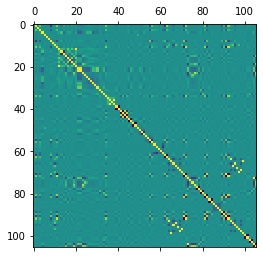

Annual_Premium    0.031891
Claim_Count       0.321380
Loss_Amount       1.000000
Frequency         0.146227
Severity          0.993388
SYS_Renewed_N     0.033453
SYS_Renewed_Y     0.033453
Name: Loss_Amount, dtype: float64

In [62]:
import matplotlib.pyplot as plt
cor = df_copy.corr()
#Correlation with output variable
cor_target = abs(cor["Loss_Amount"])
plt.matshow(df_copy.corr())
plt.show()
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

In [29]:
for column in df_copy:
    print("--------------------")
    print('Colunm Name :'+ column)
    print(df_copy[column].unique())
    print("--------------------")

--------------------
Colunm Name :Policy_Zip_Code_Garaging_Location
['43046' '43555' '43561' ... 14344 43191 42670]
--------------------
--------------------
Colunm Name :Vehicle_Territory
[35 17 27 30 31 32 26 13 16 36 37 20 18 22 15 19]
--------------------
--------------------
Colunm Name :Vehicle_Make_Year
[2004 2005 1985 1991 2001 1995 1997 1998 1990 1986 1992 1996 1984 2002
 1988 2006 1999 2003 2000 1975 1993 1980 1982 1994 2007 1978 1983 1987
 1973 1989 1969 1976 1954 1970 1977 1955 1964 1981 1979 1966 1972 1965
 1971 1961 1962 1974 1968 1967 1960 1952 1953 1940 1963 1959 1950 1957
 1928 1956 1947 1948 1951 1939 2008 1934 1949 1930 1932 1941 1958 1937
 1924 1935 1938 1931 1936 1946 1945 1929 1942 1927]
--------------------
--------------------
Colunm Name :Vehicle_New_Cost_Amount
[1.71608376e+04 2.00000000e+04 2.20000000e+04 1.80000000e+04
 2.10000000e+04 8.00000000e+00 2.00000000e+00 2.80000000e+04
 1.30000000e+04 9.82030000e+04 1.40000000e+04 2.70000000e+04
 0.00000000e+00 4.0

[1 0]
--------------------
--------------------
Colunm Name :Policy_Installment_Term_6
[1 0]
--------------------
--------------------
Colunm Name :Policy_Installment_Term_12
[0 1]
--------------------
--------------------
Colunm Name :Policy_Billing_Code_Direct Billed to Insured
[1 0]
--------------------
--------------------
Colunm Name :Policy_Billing_Code_Premium Finance
[0 1]
--------------------
--------------------
Colunm Name :Policy_Method_Of_Payment_Installment
[0 1]
--------------------
--------------------
Colunm Name :Policy_Method_Of_Payment_Pre-paid
[1 0]
--------------------
--------------------
Colunm Name :Policy_Reinstatement_Fee_Indicator_N
[1 0]
--------------------
--------------------
Colunm Name :Policy_Reinstatement_Fee_Indicator_Y
[0 1]
--------------------
--------------------
Colunm Name :Vehicle_Usage_Business
[0 1]
--------------------
--------------------
Colunm Name :Vehicle_Usage_Farm    
[1 0]
--------------------
--------------------
Colunm Name :Vehi

In [64]:
important_features = ["Vehicle_Make_Year",
"Vehicle_Symbol",
"Vehicle_Collision_Coverage_Deductible",
"Driver_Total_Teenager_Age_15_19",
"Annual_Premium",
"Loss_Amount",
"Policy_Installment_Term",
"SYS_Renewed_N",
"SYS_Renewed_Y","Driver_Total_Male",
"Driver_Total_Female","Driver_Total_Single","Driver_Total_Married",
"Vehicle_Youthful_Good_Student_Code","Vehicle_Driver_Points","Vehicle_Usage_Business","Vehicle_Usage_Farm ",
"Vehicle_Usage_Pleasure","Vehicle_Usage_Work ","Vehicle_Territory"]

In [122]:
relevant_features = relevant_features.index.values

In [124]:
relevant_features1 = []
for i in relevant_features:
    relevant_features1.append(i)
relevant_features1

['Vehicle_Make_Year',
 'Vehicle_Symbol',
 'Vehicle_Age_In_Years',
 'Vehicle_Collision_Coverage_Deductible',
 'Driver_Total_Single',
 'Driver_Total_Related_To_Insured_Child',
 'Driver_Minimum_Age',
 'Driver_Maximum_Age',
 'Driver_Total_Teenager_Age_15_19',
 'Driver_Total_College_Ages_20_23',
 'Driver_Total_Adult_Ages_50_64',
 'Vehicle_Driver_Points',
 'EEA_Policy_Tenure',
 'Annual_Premium',
 'Loss_Amount',
 'Policy_Installment_Term_6',
 'Policy_Installment_Term_12',
 'Policy_Billing_Code_Direct Billed to Insured',
 'Policy_Billing_Code_Premium Finance',
 'Vehicle_Anti_Theft_Device_Not Applicable',
 'Vehicle_Anti_Theft_Device_Passive Disabling-Vehicle Recovery',
 'Vehicle_Passive_Restraint_N',
 'Vehicle_Passive_Restraint_Y',
 'Vehicle_Bodily_Injury_Limit_25-50  ',
 'Vehicle_Collision_Coverage_Indicator_N',
 'Vehicle_Collision_Coverage_Indicator_Y',
 'Vehicle_Youthful_Driver_Training_Code_Not Applicable                 ',
 'Vehicle_Youthful_Driver_Training_Code_Without Driver Training    

In [65]:
df_copy1 = df_copy.filter(important_features, axis=1)

In [66]:
from sklearn.model_selection import train_test_split
y_data = df_copy1['Loss_Amount'].values
X_data = df_copy1.drop('Loss_Amount', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=42)
X_train.shape

(270343, 15)

In [67]:
X_test.shape

(133155, 15)

In [68]:
cor = df_copy.corr()
#Correlation with output variable
cor_target = abs(cor["Loss_Amount"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features

Vehicle_Make_Year                                                        0.026888
Vehicle_Symbol                                                           0.021740
Vehicle_Age_In_Years                                                     0.027696
Vehicle_Collision_Coverage_Deductible                                    0.020526
Driver_Total_Single                                                      0.014457
Driver_Total_Related_To_Insured_Child                                    0.015351
Driver_Minimum_Age                                                       0.017394
Driver_Maximum_Age                                                       0.015407
Driver_Total_Teenager_Age_15_19                                          0.020364
Driver_Total_College_Ages_20_23                                          0.010169
Driver_Total_Adult_Ages_50_64                                            0.011445
Vehicle_Driver_Points                                                    0.013075
EEA_Policy_Tenur

In [69]:
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# fit the regressor with x and y data 
regressor.fit(X_train ,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [70]:
y_pred = regressor.predict(X_data)  
y_pred.shape

(403498,)

In [71]:
MSE = np.square(np.subtract(y_data, y_pred)).mean()
print(MSE)

4951962.998417733


In [72]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_data, y_pred)

313.2074913359994

In [73]:
def testPortFolio(testing_portfolio):
    testing_portfolio = testing_portfolio.drop(['PolicyNo','Vehicle_Make_Description','EEA_PolicyYear','Vehicle_Comprehensive_Coverage_Limit','Vehicle_Comprehensive_Coverage_Indicator'], axis=1)
    testing_portfolio = testing_portfolio[(testing_portfolio.EEA_Policy_Zip_Code_3 != "Unknown")  & (testing_portfolio.Vehicle_Anti_Theft_Device != "Unknown") & 
            (testing_portfolio.Vehicle_Passive_Restraint != "Unknown") & (testing_portfolio.Policy_Zip_Code_Garaging_Location != "Unknown") &
            (testing_portfolio.Vehicle_Days_Per_Week_Driven != -1) & (testing_portfolio.EEA_Policy_Tenure != -1) & 
            (testing_portfolio.Vehicle_Symbol != -1) & (testing_portfolio.Vehicle_Bodily_Injury_Limit.dropna() ) & (testing_portfolio.Vehicle_Bodily_Injury_Limit != '1M-1M  ') &
           (testing_portfolio.Driver_Maximum_Age != 0 ) & (testing_portfolio.Driver_Minimum_Age != 0 ) ]
    testing_portfolio['Vehicle_New_Cost_Amount'] =testing_portfolio['Vehicle_New_Cost_Amount'].mask(testing_portfolio['Vehicle_New_Cost_Amount'] == -1)
    testing_portfolio['Vehicle_New_Cost_Amount'].fillna(testing_portfolio['Vehicle_New_Cost_Amount'].mean(), inplace=True)
    testing_portfolio['Vehicle_Miles_To_Work'] =testing_portfolio['Vehicle_Miles_To_Work'].mask(testing_portfolio['Vehicle_Miles_To_Work'] == -1)
    testing_portfolio['Vehicle_Miles_To_Work'].fillna(testing_portfolio['Vehicle_Miles_To_Work'].mean(), inplace=True)
    testing_portfolio['Vehicle_Med_Pay_Limit'] =testing_portfolio['Vehicle_Med_Pay_Limit'].mask(testing_portfolio['Vehicle_Med_Pay_Limit'] == -1)
    testing_portfolio['Vehicle_Med_Pay_Limit'].fillna(testing_portfolio['Vehicle_Med_Pay_Limit'].mean(), inplace=True)
    testing_portfolio['Vehicle_Physical_Damage_Limit'] =testing_portfolio['Vehicle_Physical_Damage_Limit'].mask(testing_portfolio['Vehicle_Physical_Damage_Limit'] == -1)
    testing_portfolio['Vehicle_Physical_Damage_Limit'].fillna(testing_portfolio['Vehicle_Physical_Damage_Limit'].mean(), inplace=True)
    testing_portfolio['Vehicle_Collision_Coverage_Deductible'] =testing_portfolio['Vehicle_Collision_Coverage_Deductible'].mask(testing_portfolio['Vehicle_Collision_Coverage_Deductible'] == -1)
    testing_portfolio['Vehicle_Collision_Coverage_Deductible'] = testing_portfolio['Vehicle_Collision_Coverage_Deductible'].fillna(0)
    testing_portfolio['Vehicle_Annual_Miles'] = testing_portfolio['Vehicle_Annual_Miles'].mask(testing_portfolio['Vehicle_Annual_Miles'] == "Unknown")
    testing_portfolio['Vehicle_Annual_Miles'].fillna('0', inplace = True)
    testing_portfolio['Vehicle_Number_Of_Drivers_Assigned'].replace([99],9)
    testing_portfolio['Vehicle_Number_Of_Drivers_Assigned'] =testing_portfolio['Vehicle_Number_Of_Drivers_Assigned'].mask(testing_portfolio['Vehicle_Number_Of_Drivers_Assigned'] == 99)
    testing_portfolio['Vehicle_Number_Of_Drivers_Assigned'].fillna(9, inplace = True)
    testing_portfolio['EEA_Policy_Zip_Code_3'] = testing_portfolio['EEA_Policy_Zip_Code_3'].astype(int)
    testing_portfolio_copy = pd.get_dummies(testing_portfolio, columns=categorical_columns)

    testing_portfolio_copy1 = testing_portfolio_copy.filter(important_features, axis=1)

    y_pred = regressor.predict(testing_portfolio_copy1)
    total_annual_prem = testing_portfolio_copy1['Annual_Premium'].sum()
    total_loss = y_pred.sum()
    ln_log = np.log(total_loss/total_annual_prem)
    return ln_log

In [74]:
result = []


directoryPath = "2019_Fall_testing_portfolios"
import os
for root, dirs, files in os.walk(directoryPath):
    for filename in files:
        print(filename)
        ans = testPortFolio(pd.read_csv(directoryPath+'/'+filename))
        ID = filename.replace('test_','')
        result.append([ID,ans])

result_df = pd.DataFrame(result, columns = ['ID', 'ln_LR'])
result_df['ID'] = result_df['ID'].str.replace('.csv', '')
result_df.to_csv('result.csv', encoding='utf-8', index=False)
result_df

test_portfolio_120.csv
test_portfolio_134.csv
test_portfolio_26.csv
test_portfolio_444.csv
test_portfolio_336.csv
test_portfolio_450.csv
test_portfolio_518.csv
test_portfolio_256.csv
test_portfolio_242.csv
test_portfolio_243.csv
test_portfolio_531.csv
test_portfolio_257.csv
test_portfolio_519.csv
test_portfolio_337.csv
test_portfolio_451.csv
test_portfolio_445.csv
test_portfolio_27.csv
test_portfolio_135.csv
test_portfolio_137.csv
test_portfolio_25.csv
test_portfolio_19.csv
test_portfolio_453.csv
test_portfolio_335.csv
test_portfolio_447.csv
test_portfolio_269.csv
test_portfolio_241.csv
test_portfolio_255.csv
test_portfolio_533.csv
test_portfolio_254.csv
test_portfolio_532.csv
test_portfolio_268.csv
test_portfolio_320.csv
test_portfolio_446.csv
test_portfolio_452.csv
test_portfolio_334.csv
test_portfolio_18.csv
test_portfolio_24.csv
test_portfolio_30.csv
test_portfolio_136.csv
test_portfolio_132.csv
test_portfolio_20.csv
test_portfolio_456.csv
test_portfolio_442.csv
test_portfolio_318.

,ID,ln_LR
0,portfolio_120,-0.035900
1,portfolio_134,0.040522
2,portfolio_26,0.033390
3,portfolio_444,0.008726
4,portfolio_336,0.170359
5,portfolio_450,-0.043182
6,portfolio_518,-0.075379
7,portfolio_256,-0.085006
8,portfolio_242,-0.032581
9,portfolio_243,-0.124822
